Using device: cpu


100%|██████████| 10/10 [01:56<00:00, 11.66s/it]


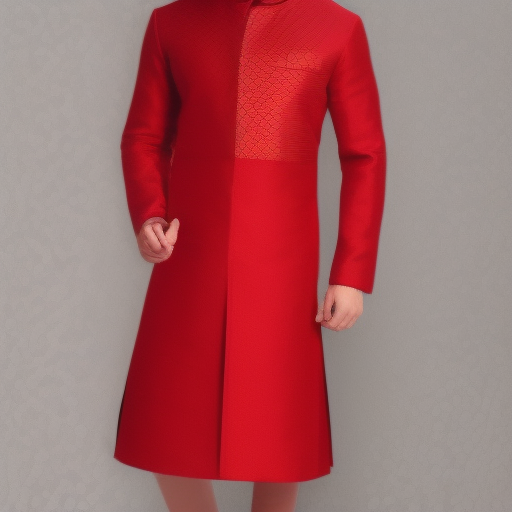

In [10]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")
model_file = "../data/model1.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE
prompt = "Red color kurta for Diwali occasion for men"
uncond_prompt = "Complete kurta should be visible"  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## SAMPLER
sampler = "ddpm"
num_inference_steps = 10
seed = 50

output_image = pipeline.generate(
    prompt = prompt,
    uncond_prompt = uncond_prompt,
    do_cfg = do_cfg,
    cfg_scale = cfg_scale,
    sampler_name = sampler,
    n_inference_steps = num_inference_steps,
    seed = seed,
    models = models,
    device = DEVICE,
    idle_device = "cpu",
    tokenizer = tokenizer,
)

display(Image.fromarray(output_image))